In [37]:
import matplotlib.pyplot as pyplot
import pandas as pd
import math as m
import os
import shutil
import glob

In [26]:
if "U" in ["p", "phi", "U"]:

    print(True)

True


In [69]:
class postProcessing():

    @staticmethod
    def results():

        """results une los diferentes archivos del directorio postProcessing creado en las diferentes corridas en un único arhivo con sufijo _resultado"""

        directorio_post_processing = "postProcessing"

        # Obtener los subdirectorios dentro de postProcessing
        subdirectorios = [os.path.join(directorio_post_processing, d) for d in os.listdir(directorio_post_processing) if os.path.isdir(os.path.join(directorio_post_processing, d))]

        # Recorrer cada subdirectorio en postProcessing
        for subdirectorio in subdirectorios:
            print(f"Procesando el subdirectorio {subdirectorio}")

            # Verificar si el subdirectorio existe
            if os.path.isdir(subdirectorio):
                contenido_subdirectorio = os.listdir(subdirectorio)  # Obtener el contenido del subdirectorio

                directorios = []
                archivos_por_nombre = {}

                # Obtener los directorios dentro del subdirectorio
                for elemento in contenido_subdirectorio:
                    ruta_elemento = os.path.join(subdirectorio, elemento)  # Obtener la ruta completa del elemento

                    if os.path.isdir(ruta_elemento):  # Verificar si es un directorio
                        directorios.append(ruta_elemento)

                # Ordenar los directorios de menor a mayor
                directorios.sort()

                # Buscar archivos con el mismo nombre en los directorios
                for directorio in directorios:
                    archivos_directorio = os.listdir(directorio)

                    for archivo in archivos_directorio:
                        ruta_archivo = os.path.join(directorio, archivo)  # Obtener la ruta completa del archivo

                        if os.path.isfile(ruta_archivo):
                            nombre_archivo = os.path.splitext(archivo)[0]  # Obtener el nombre del archivo sin la extensión

                            if nombre_archivo in archivos_por_nombre:
                                archivos_por_nombre[nombre_archivo].append(ruta_archivo)
                            else:
                                archivos_por_nombre[nombre_archivo] = [ruta_archivo]

                # Unir los archivos con el mismo nombre
                for nombre, archivos in archivos_por_nombre.items():
                    if len(archivos) > 1:
                        resultado = os.path.join(subdirectorio, nombre + "_resultado")
                        with open(resultado, "wb") as archivo_resultado:
                            for i, archivo in enumerate(archivos):
                                with open(archivo, "rb") as archivo_actual:
                                    # Si no es el primer archivo, omitir las primeras 5 filas
                                    if i > 0:
                                        for _ in range(5):
                                            next(archivo_actual)
                                    shutil.copyfileobj(archivo_actual, archivo_resultado)
                        print("Se han unido los archivos con el nombre", nombre, "en el archivo", resultado)
                    else:
                        print("No se encontraron suficientes archivos con el nombre", nombre, "para unirlos.")


    @staticmethod
    def probes(direct_probes):
        """postProcessing.probes(direct_probes)"""
        """direct_probes: string con el nombre del directorio donde se encuentran los probes a graficar"""
        """Grafica U, p_rgh, phi de existir"""
        # Verificar si el directorio probes existe
        directorio_probes = os.path.join("postProcessing", direct_probes)  # Ruta completa del directorio probes

        if os.path.isdir(directorio_probes):
            archivos_creados = []
            contenido_probes = os.listdir(directorio_probes)  # Obtener el contenido del directorio probes
            contenido_probes.sort()
            print(contenido_probes)
            print(contenido_probes)
            for elemento in contenido_probes:
                ruta_elemento = os.path.join(directorio_probes, elemento)  # Obtener la ruta completa del elemento

                if os.path.isfile(ruta_elemento):  # Verificar si es un archivo
                    archivos_creados.append(elemento)

            if len(archivos_creados) > 0:
                #Busca los arhivos creados en el directorio probes
                for archivo in archivos_creados:
                    if archivo == contenido_probes[-3]: #contenido_probes[-3] debe coincidir con U_resultado

                        df = pd.read_csv(str(directorio_probes+"/"+contenido_probes[-3]), skiprows=5, delim_whitespace=True) #Modificar skisrows según la cantidad de probes se tengan
                        data_values = df.values
                        t, Uxit, Uyi, Uzit, Uxmt, Uym, Uzmt, Uxot, Uyo, Uzot = zip(*data_values)
                        Uxi = tuple([float(elemento.replace('(', '')) for elemento in Uxit])    ##Normalizo los valores que salen con "("
                        Uxm = tuple([float(elemento.replace('(', '')) for elemento in Uxmt])    ##Normalizo los valores que salen con "("                  
                        Uxo = tuple([float(elemento.replace('(', '')) for elemento in Uxot])    ##Normalizo los valores que salen con "("                        
                        Uzi = tuple([float(elemento.replace(')', '')) for elemento in Uzit])    ##Normalizo los valores que salen con ")"                        
                        Uzm = tuple([float(elemento.replace(')', '')) for elemento in Uzmt])    ##Normalizo los valores que salen con ")"                        
                        Uzo = tuple([float(elemento.replace(')', '')) for elemento in Uzot])    ##Normalizo los valores que salen con ")"

                        U_i = []
                        for i in range(len(Uxi)):
                            U_i.append(m.sqrt(Uxi[i]**2+Uyi[i]**2+Uzi[i]**2))
                        U_m = []
                        for i in range(len(Uxi)):
                            U_m.append(m.sqrt(Uxm[i]**2+Uym[i]**2+Uzm[i]**2))
                        U_o = []
                        for i in range(len(Uxi)):
                            U_o.append(m.sqrt(Uxo[i]**2+Uyo[i]**2+Uzo[i]**2))
                        # Graficar las columnas
                        pyplot.plot(t, U_i, label='U magnitude at inlet')
                        pyplot.plot(t, U_m, label='U magnitude at mid')
                        pyplot.plot(t, U_o, label='U magnitude at outlet')

                        pyplot.xlabel('Time[s]')
                        pyplot.ylabel('U[m/s]')
                        pyplot.legend()
                        pyplot.show() 


                    elif archivo == contenido_probes[-2]: #contenido_probes[-2] debe coincidir con p_rgh_resultado
                        # Listas para almacenar los valores de las columnas
                        t = []
                        p_rgh_inlet = []
                        p_rgh_mid = []
                        p_rgh_outlet = []
                        # Leer el archivo línea por línea
                        with open(str(directorio_probes+"/"+contenido_probes[-2]), "r") as archivo:
                            lineas = archivo.readlines()
                            for linea in lineas:
                                # Omitir las líneas de comentarios
                                if not linea.startswith("#"):
                                    # Dividir la línea en columnas
                                    valores = linea.split()
                                    t.append(float(valores[0]))             # Agregar valor del tiempo
                                    p_rgh_inlet.append(float(valores[1]))   # Agregar valor del inlet
                                    p_rgh_mid.append(float(valores[2]))     # Agregar valor del medio
                                    p_rgh_outlet.append(float(valores[3]))  # Agregar valor del outlet
                        # Graficar las columnas
                        pyplot.plot(t, p_rgh_inlet, label='p_rgh_inlet')
                        pyplot.plot(t, p_rgh_mid, label='p_rgh_mid')
                        pyplot.plot(t, p_rgh_outlet, label='p_rgh_outlet')
                        pyplot.xlabel('Time')
                        pyplot.ylabel('p_rgh')
                        pyplot.legend()
                        pyplot.show()

                    elif archivo == contenido_probes[-1]:  #contenido_probes[-1] debe coincidir con phi_resultado
                        # Listas para almacenar los valores de las columnas
                        t = []
                        phi_inlet = []
                        phi_mid = []
                        phi_outlet = []
                        # Leer el archivo línea por línea
                        with open(str(directorio_probes+"/"+contenido_probes[-1]), "r") as archivo:
                            lineas = archivo.readlines()
                            for linea in lineas:
                                # Omitir las líneas de comentarios
                                if not linea.startswith("#"):
                                    # Dividir la línea en columnas
                                    valores = linea.split()
                                    t.append(float(valores[0]))            # Agregar valor del tiempo
                                    phi_inlet.append(float(valores[1]))    # Agregar valor del inlet
                                    phi_mid.append(float(valores[2]))      # Agregar valor del mid
                                    phi_outlet.append(float(valores[3]))   # Agregar valor del outlet
                        # Graficar las columnas
                        pyplot.plot(t, phi_inlet, label='phi_inlet')
                        pyplot.plot(t, phi_mid, label='phi_mid')
                        pyplot.plot(t, phi_outlet, label='phi_outlet')
                        pyplot.xlabel('Time[s]')
                        pyplot.ylabel('phi[m^3/s]')
                        pyplot.legend()
                        pyplot.show()


    @staticmethod
    def surfaceFieldValue(direct_surfaceFieldValue, quantities):
        quantities.insert(0, "t")
        directorio_probes = os.path.join("postProcessing", direct_surfaceFieldValue)

        if os.path.isdir(directorio_probes):
            archivos_creados = []
            contenido_probes = os.listdir(directorio_probes)

            filedata = pd.read_table(os.path.join(directorio_probes, "surfaceFieldValue_resultado"), skiprows=range(0, 4))
            data_values = filedata.values

            result_dict = {}

            for quantity, values in zip(quantities, zip(*data_values)):
                if quantity == "U":
                    quantity = "Ut"

                result_dict[quantity] = list(values)

            if "U" in quantities:
                U = [float(tupla[1:tupla.index(' ')]) for tupla in result_dict["Ut"]]


            for elemento in contenido_probes:
                ruta_elemento = os.path.join(directorio_probes, elemento)

                if os.path.isfile(ruta_elemento):
                    archivos_creados.append(elemento)

            if len(archivos_creados) > 0:
                for archivo in archivos_creados:
                    if archivo == "surfaceFieldValue_resultado":
                        for i in ("U", "p", "p_rgh", "phi"):
                            if i in quantities:
                                if i == "U":
                                    pyplot.plot(result_dict["t"], U, "g--")
                                    pyplot.xlabel("time[s]")
                                    pyplot.ylabel("U[m/s]")
                                    pyplot.axis([0, max(result_dict["t"]), min(U), max(U)])
                                    pyplot.show()
                                elif i == "p":
                                    pyplot.plot(result_dict["t"], result_dict["p"], "g--")
                                    pyplot.xlabel("time[s]")
                                    pyplot.ylabel("p")
                                    pyplot.axis([0, max(result_dict["t"]), min(result_dict["p"]), max(result_dict["p"])])
                                    pyplot.show()
                                elif i == "p_rgh":
                                    pyplot.plot(result_dict["t"], result_dict["p_rgh"], "g--")
                                    pyplot.xlabel("time[s]")
                                    pyplot.ylabel("p_rgh")
                                    pyplot.axis([0, max(result_dict["t"]), min(result_dict["p_rgh"]), max(result_dict["p_rgh"])])
                                    pyplot.show()
                                elif i == "phi":
                                    pyplot.plot(result_dict["t"], result_dict["phi"], label='phi_inlet')
                                    pyplot.xlabel('Time[s]')
                                    pyplot.ylabel('phi[m^3/s]')
                                    pyplot.axis([0, max(result_dict["t"]), min(result_dict["phi"]), max(result_dict["phi"])])
                                    pyplot.legend()
                                    pyplot.show()


    @staticmethod
    def singleGraph(direct_singleGraph, order):
        directorio_probes = os.path.join("postProcessing", direct_singleGraph)
    
        if os.path.isdir(directorio_probes):
            archivos_creados = []
            contenido_probes = os.listdir(directorio_probes)
    
            archivos_resultado = glob.glob(os.path.join(directorio_probes, "*_resultado"))
    
            if archivos_resultado:
                archivo_resultado = archivos_resultado[0]  # Obtener el primer archivo que cumple el patrón
                filedata = pd.read_table(archivo_resultado, header=None)
                data_values = filedata.values
    
                result_dict = {}
    
                columnas = zip(*data_values)
    
                # Asignación de variables extendida
                variables = [f"columna{i}" for i in range(1, len(data_values[0]) + 1)]
                for variable, columna in zip(variables, columnas):
                    result_dict[variable] = columna
    
            for columna, valores in result_dict.items():
                if columna != "columna1":  # Saltar la columna "columna1" que se utilizará como eje x
                    label = order.pop(0) if order else columna
                    pyplot.plot(result_dict["columna1"], valores, label=label)
                    pyplot.xlabel('NO ES TIME NO SE QUE VA')
                    pyplot.ylabel(label)
                    pyplot.axis([0, max(result_dict["columna1"]), min(valores), max(valores)])
                    pyplot.legend()
                    pyplot.show()

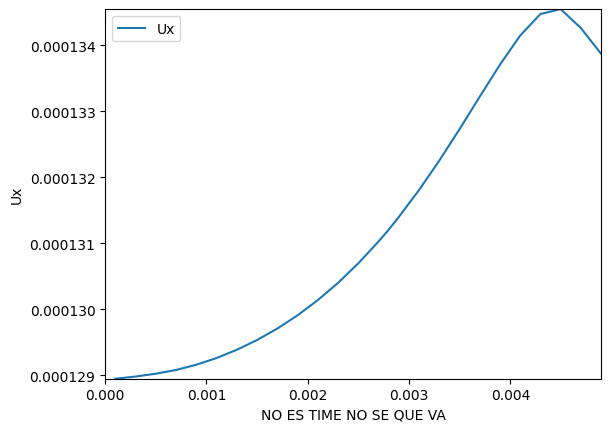

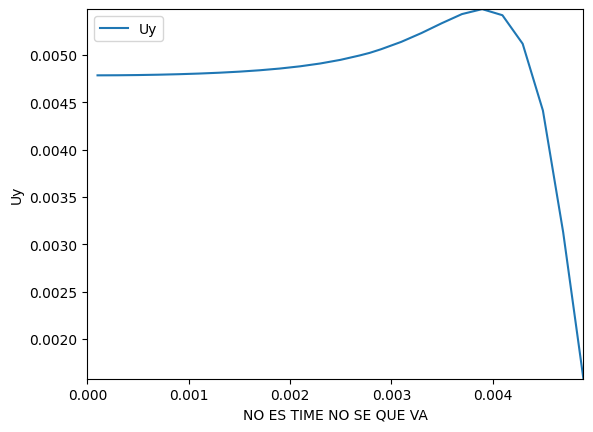

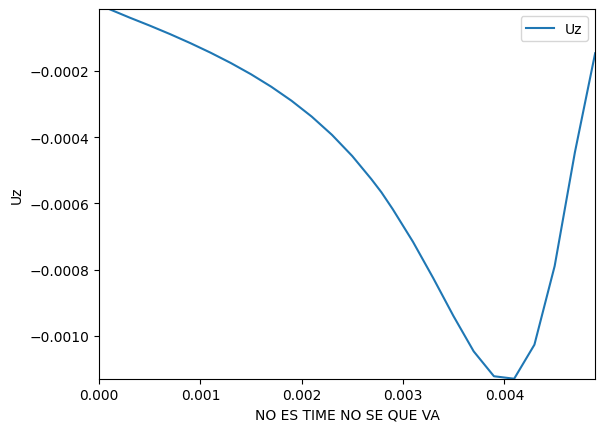

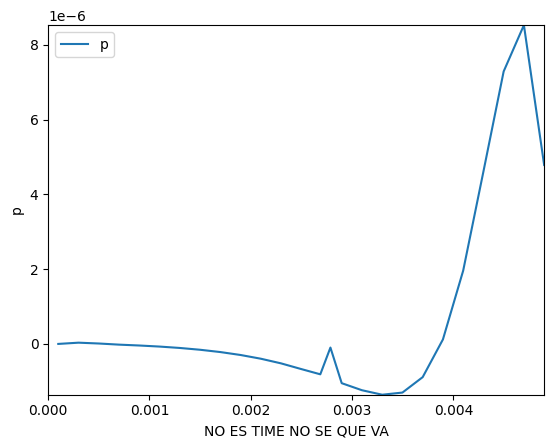

In [70]:
postProcessing.singleGraph("singleGraph", ["Ux","Uy","Uz","p"])

In [ ]:
postProcessing.results()

In [ ]:
postProcessing.probes("probes")

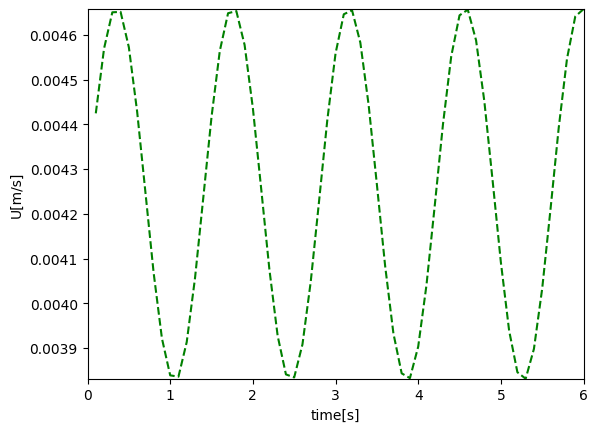

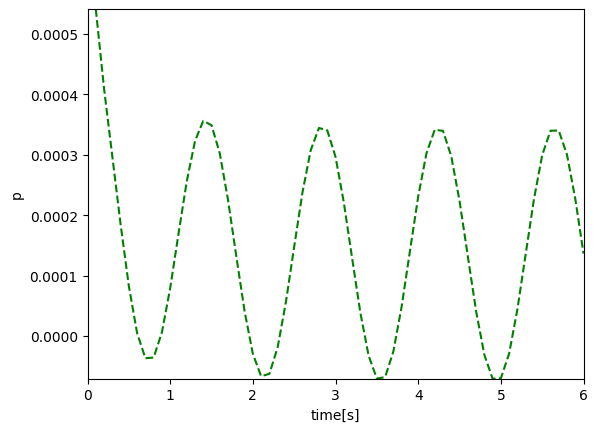

In [28]:
postProcessing.surfaceFieldValue("surfaceFieldValue_inlet_U-p", ["U", "p"])

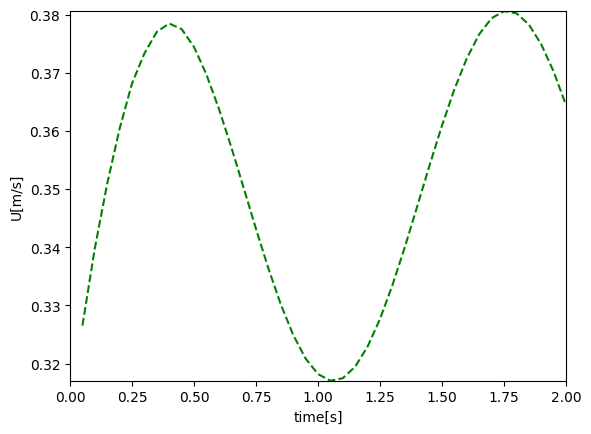

C:\Users\josei\AppData\Local\Temp\ipykernel_8692\2836596298.py:221: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  pyplot.axis([0, max(result_dict["t"]), min(result_dict["p"]), max(result_dict["p"])])


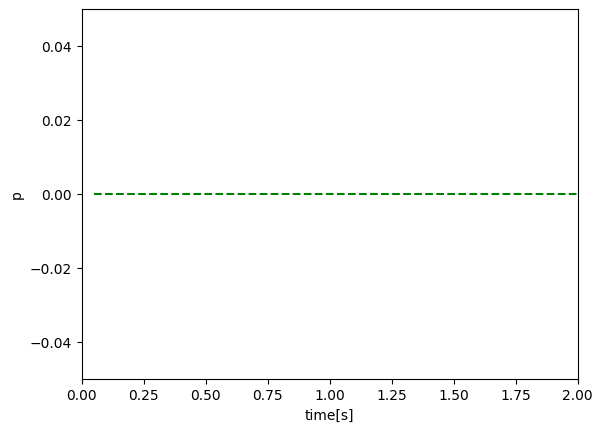

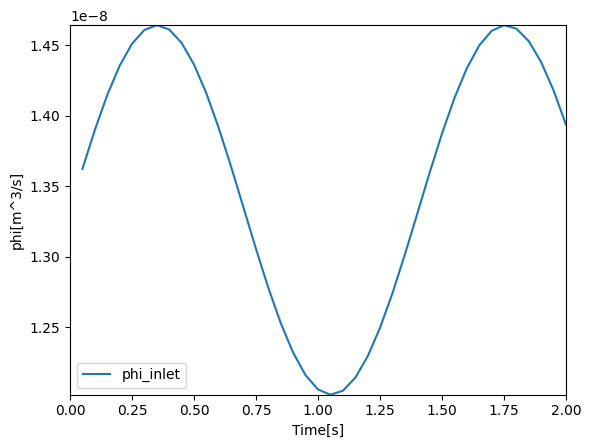

In [35]:
postProcessing.surfaceFieldValue("surfaceFieldValue_outlet", ["U","p","phi"])